Топ-3 жанра:
 favorite_genre
Комедия       24
Боевик        22
Фантастика    20
Name: count, dtype: int64


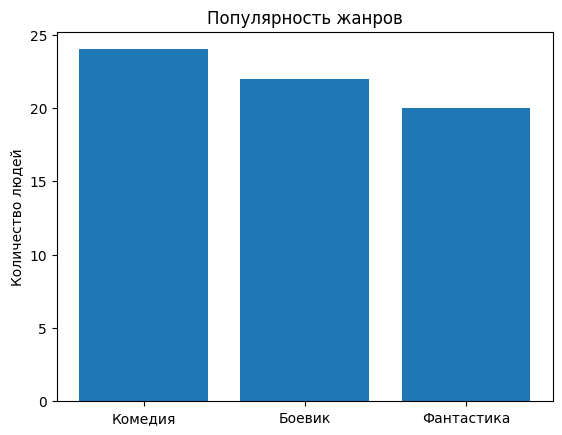

Когда смотрят разные жанры:
 watch_time      Вечер  День  Ночь  Утро
favorite_genre                         
Артхаус             3     4     8     4
Боевик              9     7     1     5
Драма               4     2     7     2
Комедия             6     5     5     8
Фантастика          3     2    11     4


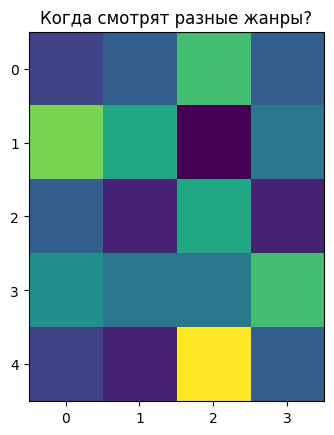

Среднее количество фильмов в неделю:
 platform
YouTube      5.047619
Netflix      4.960000
КиноПоиск    4.619048
Другое       4.484848
Name: movies_per_week, dtype: float64


/tmp/ipython-input-30-1996074165.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


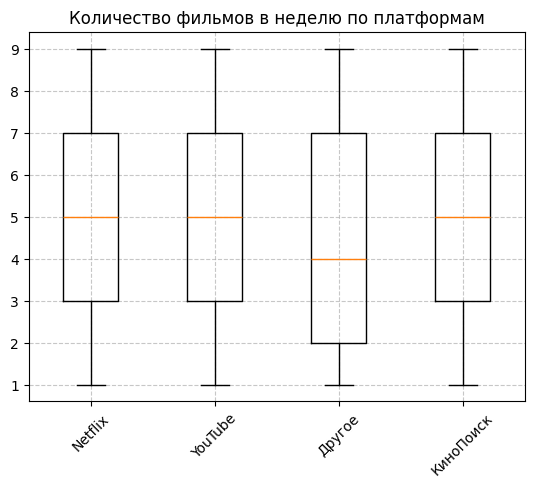

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Создаем искусственные данные
np.random.seed(42)
data = {
    'age': np.random.randint(18, 26, 100),  # 100 человек 18-25 лет
    'favorite_genre': np.random.choice(['Комедия', 'Драма', 'Артхаус', 'Боевик', 'Фантастика'], 100),
    'watch_time': np.random.choice(['Утро', 'День', 'Вечер', 'Ночь'], 100),
    'platform': np.random.choice(['КиноПоиск', 'Netflix', 'YouTube', 'Другое'], 100),
    'movies_per_week': np.random.randint(1, 10, 100)
}

df = pd.DataFrame(data)


#Топ-3 жанра по популярности
genre_counts = df['favorite_genre'].value_counts().head(3)
print("Топ-3 жанра:\n", genre_counts)
# Визуализация
x=genre_counts.index
y=genre_counts.values
plt.bar(x, y)
plt.title('Популярность жанров')
plt.ylabel('Количество людей')
plt.show()


#Связь жанра и времени просмотра
cross_tab = pd.crosstab(df['favorite_genre'], df['watch_time'])
print("Когда смотрят разные жанры:\n", cross_tab)
# Тепловая карта
plt.imshow(cross_tab, cmap='viridis')
plt.title('Когда смотрят разные жанры?')
plt.show()


#Среднее количество фильмов в неделю по платформам
platform_stats = df.groupby('platform')['movies_per_week'].mean().sort_values(ascending=False)
print("Среднее количество фильмов в неделю:\n", platform_stats)
#boxplot
data = []
labels = []
for platform in df['platform'].unique():
    data.append(df[df['platform'] == platform]['movies_per_week'].values)
    labels.append(platform)
plt.boxplot(data, labels=labels)
plt.title('Количество фильмов в неделю по платформам')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()